In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [3]:
# cpu ver.

digits = load_digits()
X = digits.data
y = digits.target
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

optimizer = optim.Adam(net.parameters())
loss_fn = nn.CrossEntropyLoss()
losses = []

for epoc in range(10000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [4]:
# gpu ver
X = digits.data
y = digits.target
X = torch.tensor(X, dtype=torch.float32).to("cuda:0")
y = torch.tensor(y, dtype=torch.int64).to("cuda:0")
net.to("cuda:0")

optimizer = optim.Adam(net.parameters())
loss_fn = nn.CrossEntropyLoss()
losses = []

for epoc in range(10000):
    optimizer.zero_grad()
    y_pred = net(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [5]:
y_pred = net(X)
y_pred = torch.argmax(y_pred, dim=1)
acc = (y_pred == y).sum().item() / len(y)
print(acc)

1.0


In [6]:
from torch.utils.data import TensorDataset, DataLoader

ds = TensorDataset(X, y)
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
net.cuda()
optimizer = optim.Adam(net.parameters())
loss_fn = nn.CrossEntropyLoss()
losses = []

for epoc in range(10):
    running_loss = 0.0
    for xx, yy in loader:
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)

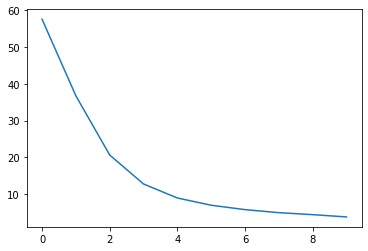

In [7]:
plt.plot(losses)

In [8]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32).cuda()
y_train = torch.tensor(y_train, dtype=torch.int64).cuda()
X_test = torch.tensor(X_test, dtype=torch.float32).cuda()
y_test = torch.tensor(y_test, dtype=torch.int64).cuda()

k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, 10)
)
net.cuda()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train, y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [9]:
train_losses = []
test_losses = []
for epoc in range(100):
    for xx, yy in loader:
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_losses.append(loss_fn(net(X_train), y_train).item())
    test_losses.append(loss_fn(net(X_test), y_test).item())

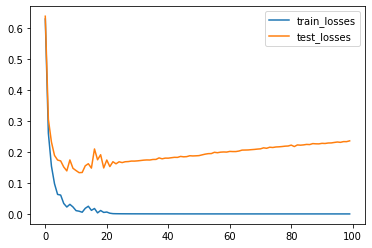

In [10]:
plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

In [11]:
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, 10)
)
net.cuda()

Sequential(
  (0): Linear(in_features=64, out_features=100, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5)
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5)
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5)
  (9): Linear(in_features=100, out_features=100, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.5)
  (12): Linear(in_features=100, out_features=10, bias=True)
)

In [12]:
optimizer = optim.Adam(net.parameters())
train_losses = []
test_losses = []
for epoc in range(100):
    net.train()
    for xx, yy in loader:
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    net.eval()
    train_losses.append(loss_fn(net(X_train), y_train).item())
    test_losses.append(loss_fn(net(X_test), y_test).item())

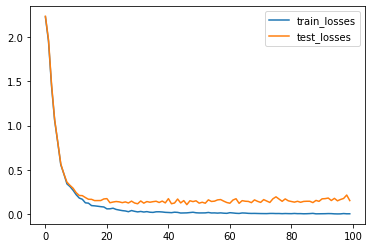

In [13]:
plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

In [14]:
y_train_pred = net(X_train).argmax(dim=1)
y_test_pred = net(X_test).argmax(dim=1)
print("train:", (y_train_pred == y_train).sum().item() / len(y_train))
print("test:", (y_test_pred == y_test).sum().item() / len(y_test))

train: 0.9984089101034208
test: 0.9722222222222222


train: 1.0
test: 0.975925925925926


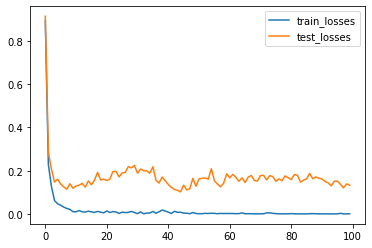

In [15]:
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, 10)
)
net.cuda()

optimizer = optim.Adam(net.parameters())
train_losses = []
test_losses = []
for epoc in range(100):
    net.train()
    for xx, yy in loader:
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    net.eval()
    train_losses.append(loss_fn(net(X_train), y_train).item())
    test_losses.append(loss_fn(net(X_test), y_test).item())
    
plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

y_train_pred = net(X_train).argmax(dim=1)
y_test_pred = net(X_test).argmax(dim=1)
print("train:", (y_train_pred == y_train).sum().item() / len(y_train))
print("test:", (y_test_pred == y_test).sum().item() / len(y_test))

train: 0.9976133651551312
test: 0.9666666666666667


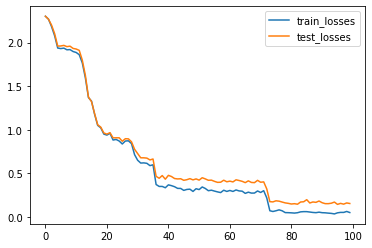

In [20]:
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True, p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        return x
    
mlp = nn.Sequential(
    CustomLinear(64, 200),
    CustomLinear(200, 200),
    CustomLinear(200, 200),
    CustomLinear(200, 10)
)
mlp.cuda()


optimizer = optim.Adam(mlp.parameters())
train_losses = []
test_losses = []
for epoc in range(100):
    mlp.train()
    for xx, yy in loader:
        y_pred = mlp(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    mlp.eval()
    train_losses.append(loss_fn(mlp(X_train), y_train).item())
    test_losses.append(loss_fn(mlp(X_test), y_test).item())
    
plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

y_train_pred = mlp(X_train).argmax(dim=1)
y_test_pred = mlp(X_test).argmax(dim=1)
print("train:", (y_train_pred == y_train).sum().item() / len(y_train))
print("test:", (y_test_pred == y_test).sum().item() / len(y_test))

train: 0.8989657915672236
test: 0.8574074074074074


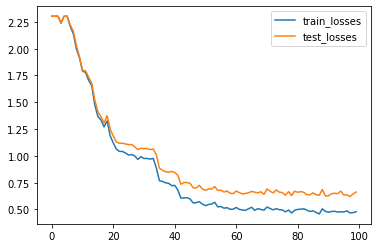

In [22]:
class MyMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.ln1 = CustomLinear(in_features, 200)
        self.ln2 = CustomLinear(200, 200)
        self.ln3 = CustomLinear(200, 200)
        self.ln4 = CustomLinear(200, out_features)
        
    def forward(self, x):
        x = self.ln1(x)
        x = self.ln2(x)
        x = self.ln3(x)
        x = self.ln4(x)
        return x

mlp = MyMLP(64, 10)
mlp.cuda()


optimizer = optim.Adam(mlp.parameters())
train_losses = []
test_losses = []
for epoc in range(100):
    mlp.train()
    for xx, yy in loader:
        y_pred = mlp(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    mlp.eval()
    train_losses.append(loss_fn(mlp(X_train), y_train).item())
    test_losses.append(loss_fn(mlp(X_test), y_test).item())
    
plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

y_train_pred = mlp(X_train).argmax(dim=1)
y_test_pred = mlp(X_test).argmax(dim=1)
print("train:", (y_train_pred == y_train).sum().item() / len(y_train))
print("test:", (y_test_pred == y_test).sum().item() / len(y_test))